In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

# Train dataset

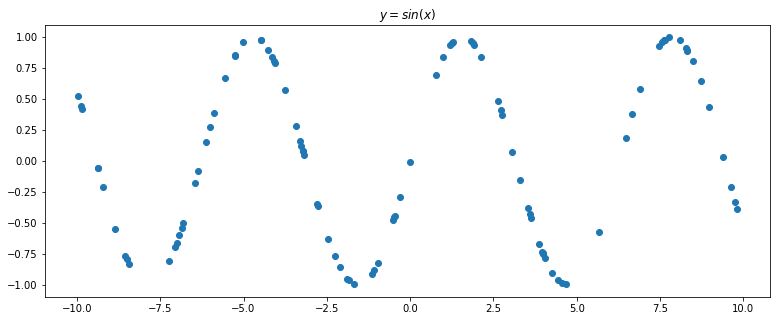

In [3]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

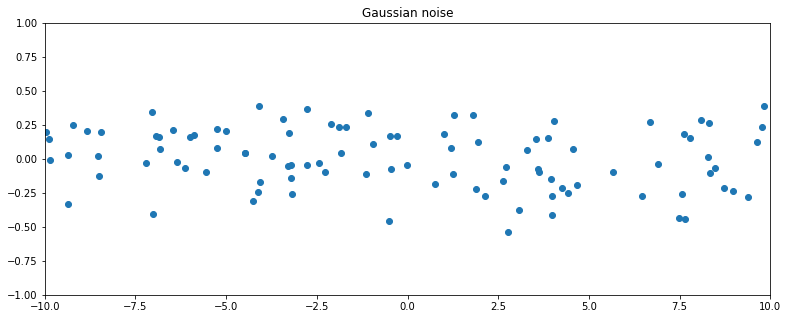

In [4]:
noise = torch.randn(y_train.shape) / 5.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

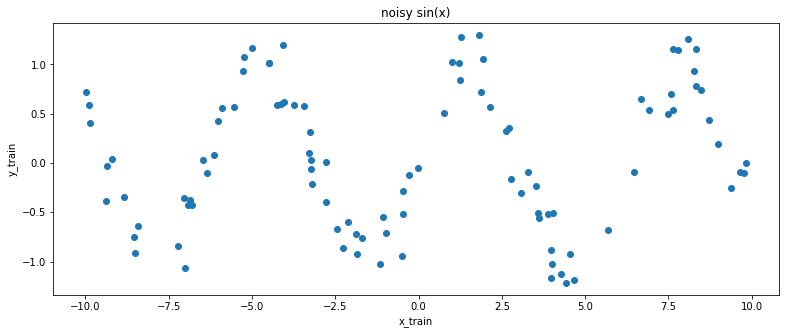

In [5]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [6]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

In [7]:
tmp = torch.Tensor([1,2,3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


# Validation dataset

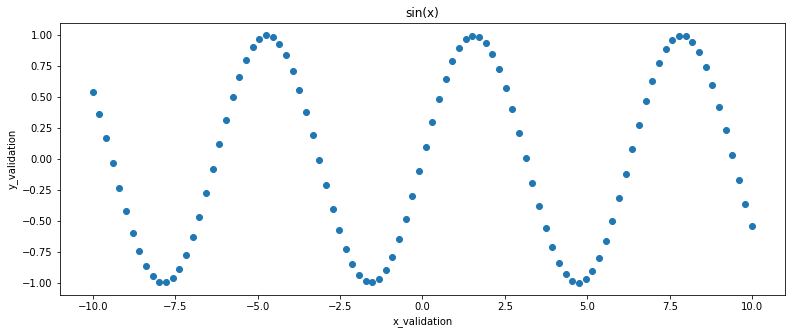

In [8]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [9]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

# Model construction

In [10]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        # 
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(3)

# Prediction

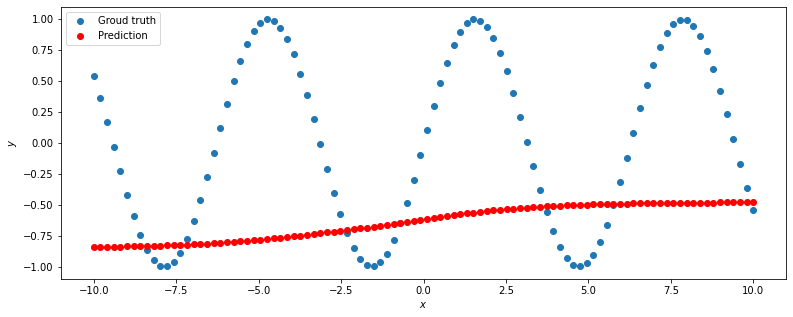

In [11]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

# Optimizer

In [12]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

# Loss function

In [13]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

# Training procedure

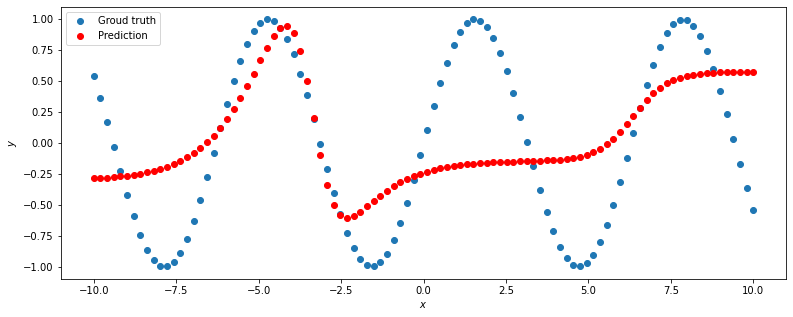

In [14]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(sine_net, x_validation, y_validation)

# Let's add new fully-connected layer and substitude sigmoid with tanh

In [15]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super().__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons, bias=True)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons, bias=True)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1, bias=True)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        # put our code here
        return x


sine_net = SineNet(int(input()))
sine_net.forward(torch.Tensor([1.]))

print(sine_net)

SineNet(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (act1): Tanh()
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (act2): Tanh()
  (fc3): Linear(in_features=10, out_features=1, bias=True)
)


In [16]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

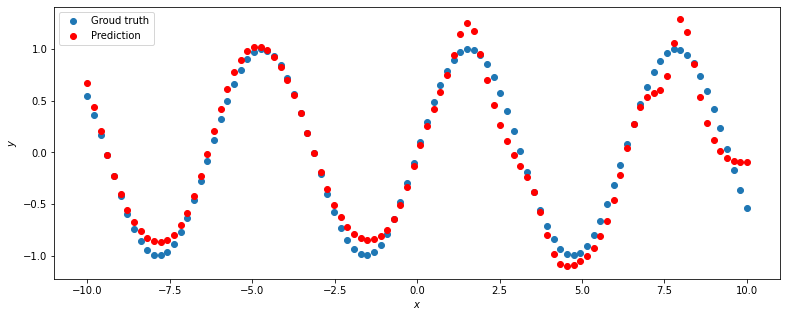

In [17]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(sine_net, x_validation, y_validation)

## 3.5 module task

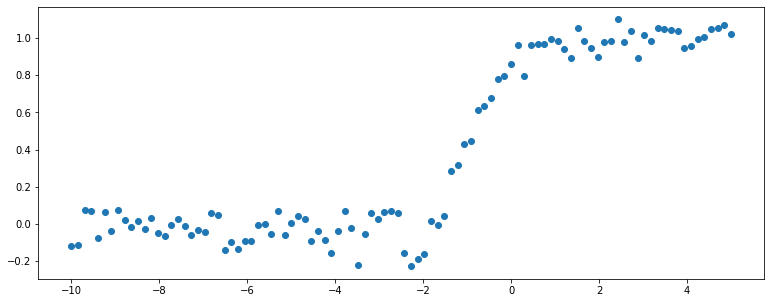

In [86]:
def target_function(x):
    return 2**x * torch.sin(2**-x)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:

plt.scatter(x_train, y_train)

In [159]:
class RegressionNet(torch.nn.Module):
    # your code here
    def __init__(self, hidden_layers=1, hidden_neurons=20) :
        super().__init__()
        self.layers = [None]*(hidden_layers+1)
        self.activations = [None]*(hidden_layers+1)

        self.layers[0] = torch.nn.Linear(1, hidden_neurons, bias=True)
        self.activations[0] = torch.nn.Tanh()

        for i in range(1, hidden_layers) :
            self.layers[i] = torch.nn.Linear( hidden_neurons, hidden_neurons, bias=True)
            self.activations[i] = torch.nn.Tanh()
        
        self.layers[-1] = torch.nn.Linear(hidden_neurons, 1, bias=True)
        self.activations[-1] = torch.nn.Tanh()
        
        self.layers = torch.nn.ModuleList(self.layers)

        # self.act1 = torch.nn.Tanh()
        # self.fc2 = torch.nn.Linear(50, 50, bias=True)
        # self.act2 = torch.nn.Tanh()
        # self.fc3 = torch.nn.Linear(50, 1, bias=True)
        # self.act3 = torch.nn.Tanh()
        # self.fc4 = torch.nn.Linear(30, 1, bias=True)
        # self.act4 = torch.nn.Tanh()
        
    def forward(self, x) :
        
        for layer, act in zip(self.layers, self.activations) :
            x = layer(x)
            y = act(x)
        # x = self.fc1(x)
        # x = self.act1(x)
        # x = self.fc2(x)
        # x = self.act2(x)
        # x = self.fc3(x)
        # x = self.act3(x)
        # x = self.fc4(x)
        # x = self.act4(x)
        
        # put our code here
        return x

def MSE(pred, target):
    return ((pred - target)**2).mean()
    # your code here

def cross_entropy(pred, target):
    # Apply it only on data in range (0,1)
    return (-target*pred.log()).sum()



In [163]:
net = RegressionNet(hidden_layers=3, hidden_neurons=50)

optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
loss = MSE

for epoch_index in range(1500):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()
    
    

In [164]:
# print(net.layers)
for param in net.parameters():
    print(type(param), param.size())
print(net.activations)

<class 'torch.nn.parameter.Parameter'> torch.Size([50, 1])
<class 'torch.nn.parameter.Parameter'> torch.Size([50])
<class 'torch.nn.parameter.Parameter'> torch.Size([50, 50])
<class 'torch.nn.parameter.Parameter'> torch.Size([50])
<class 'torch.nn.parameter.Parameter'> torch.Size([50, 50])
<class 'torch.nn.parameter.Parameter'> torch.Size([50])
<class 'torch.nn.parameter.Parameter'> torch.Size([1, 50])
<class 'torch.nn.parameter.Parameter'> torch.Size([1])
[Tanh(), Tanh(), Tanh(), Tanh()]


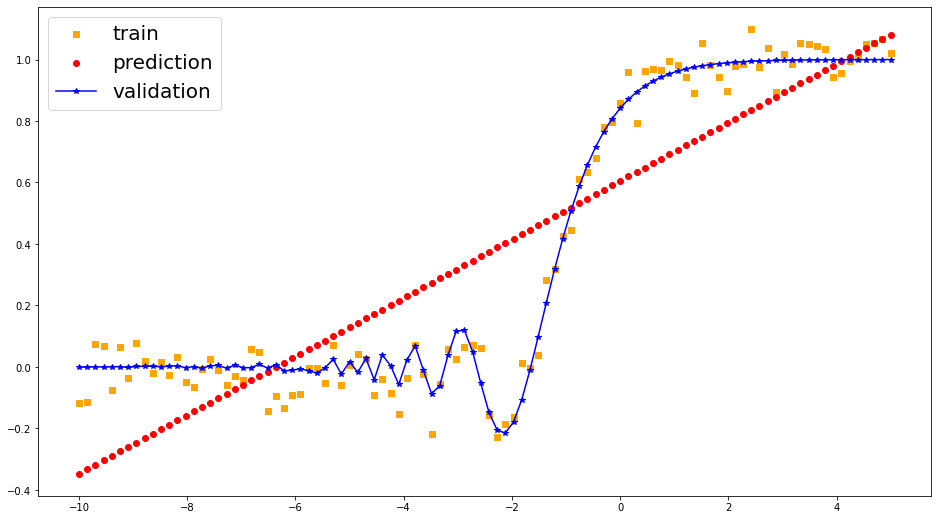

In [165]:
fig, ax = plt.subplots( figsize=(16,9) )

ax.scatter(x_train, y_train, label='train' , c='orange', marker='s')
ax.scatter(x_validation.detach().numpy(), net.forward(x_validation).detach().numpy(), label='prediction', c='r', marker='o')
ax.plot(x_validation.detach().numpy(), y_validation, label='validation', c='blue', marker='*')
ax.legend(fontsize=20)

plt.show()

In [122]:
# Проверка осуществляется вызовом кода:
def metric(pred, target):
   return (pred - target).abs().mean()
#
print(metric(net.forward(x_validation), y_validation).item())
# (раскомментируйте, если решаете задание локально)

0.029946647584438324
